In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import seaborn as sns
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import warnings
%matplotlib inline

In [7]:
gdf = gpd.read_file('../UtahForge_logdata/localUTAHFORGEDATA/otherwells/Utah FORGE Phase 2C Well Locations/Utah_FORGE_Phase2C_wells.shp')
df_wells = pd.DataFrame(gdf)
#df_wells = pd.DataFrame(gdf.drop(columns='geometry'))

In [8]:
df_wells.head(10)

,Id,Lat,Long,Elevat_m,X_UTM,Y_UTM,Well_Name,Well_Type,geometry
0,0,-112.886642,-112.886642,1684.31,335486.0,4263160.0,68-32,seismic monitoring,POINT (335485.648 4263155.839)
1,0,-112.883218,-112.883218,1700.51,335781.0,4262990.0,78-32,seismic monitoring,POINT (335781.090 4262993.378)
2,0,-112.887006,-112.887006,1685.00,335452.0,4263040.0,58-32,deep test well,POINT (335451.500 4263036.900)
3,0,-112.917253,-112.917253,1625.00,332746.0,4259840.0,WOW-2,ground water and temperature gradient testing,POINT (332746.000 4259842.000)
4,0,-112.919879,-112.919879,1559.00,332637.0,4265600.0,WOW-3,ground water and temperature gradient testing,POINT (332637.000 4265602.000)
5,0,-112.872592,-112.872592,1738.00,336732.0,4264170.0,OH-4,ground water and temperature gradient testing,POINT (336732.003 4264165.972)
6,0,-112.779507,-112.779507,2353.00,344786.0,4260770.0,OH-3,ground water and temperature gradient testing,POINT (344786.007 4260771.963)


In [17]:
fig = px.scatter(df_wells, x='X_UTM', y='Y_UTM', text='Well_Name', log_x=True, size_max=100, color='Elevat_m')
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Utah Forge Wells', title_x=0.5)
fig.show()

In [21]:
main_78_32 = lasio.read('./localUTAHFORGEDATA/otherwells/E9OJ-00005_University-of-Utah_78-32_CBL-VDL_17APR19_Main.las')

dfmain_78_32 = main_78_32.df()


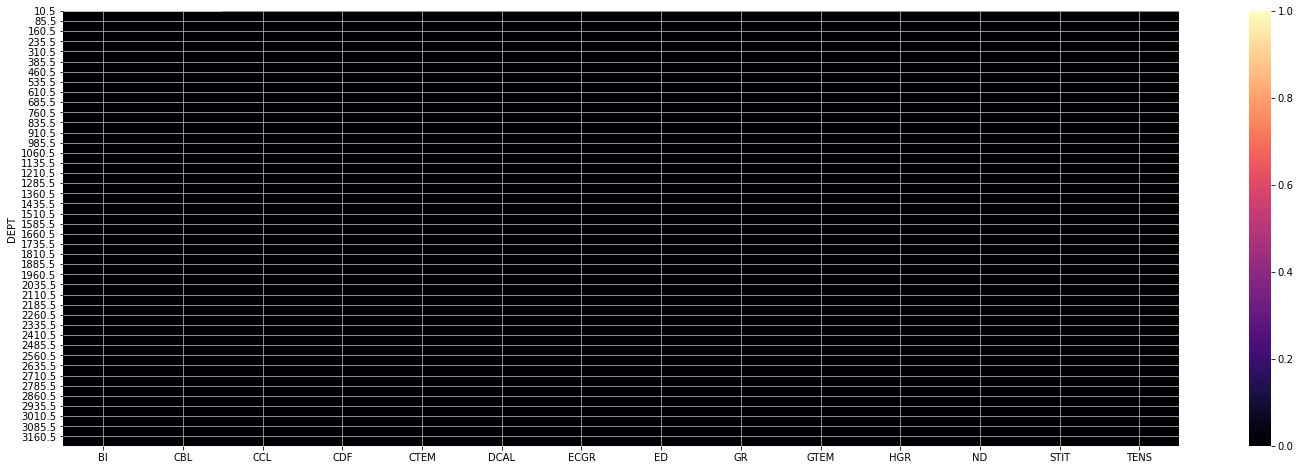

In [22]:
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(dfmain_78_32.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [31]:
dfOH3 = pd.read_csv('./localUTAHFORGEDATA/otherwells/FORGE_thermal_logs/FaT/OH3_FaT.dat',sep='\s+', header=None)
dfOH4 = pd.read_csv('./localUTAHFORGEDATA/otherwells/FORGE_thermal_logs/FaT/OH4_FaT.dat',sep='\s+', header=None)
dfWOW2 = pd.read_csv('./localUTAHFORGEDATA/otherwells/FORGE_thermal_logs/FaT/WOW2_FaT.dat',sep='\s+', header=None)
dfWOW3 = pd.read_csv('./localUTAHFORGEDATA/otherwells/FORGE_thermal_logs/FaT/WOW3_FaT.dat',sep='\s+', header=None)
print (dfWOW3)

      0          1
0   6.0  14.766103
1  10.0  17.007024
2  20.0  19.033913
3  30.0  21.429689
4  40.0  23.816873
5  50.0  25.830323
6  60.0  27.538156
7  70.0  29.455195


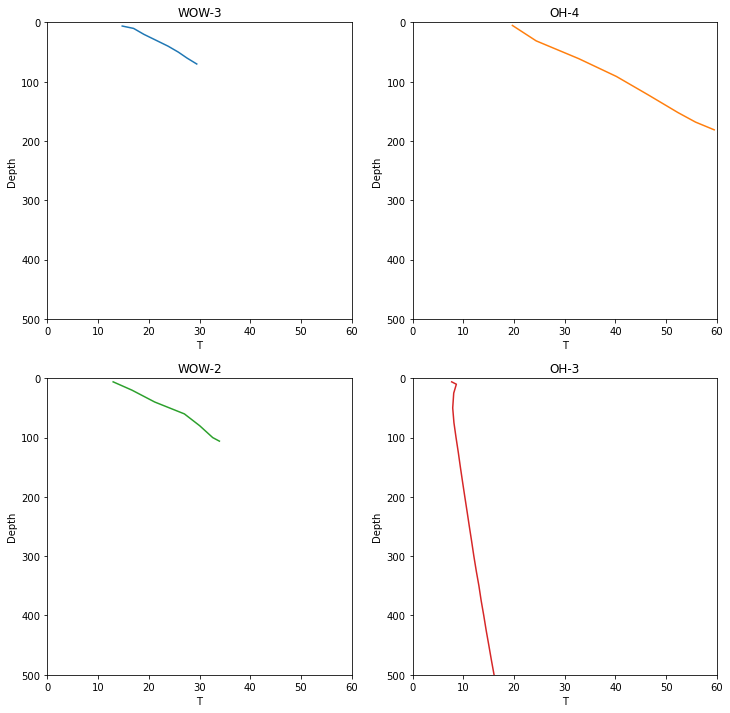

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=2, squeeze=True, figsize=(12, 12))
axs[0, 0].plot(dfWOW3[1], dfWOW3[0])
axs[0, 0].set_title('WOW-3')
axs[0, 0].set_xlim(0,60)
axs[0, 0].set_ylim(0,500)
axs[0, 0].invert_yaxis()
axs[0, 1].plot(dfOH4[1], dfOH4[0], 'tab:orange')
axs[0, 1].set_title('OH-4')
axs[0, 1].set_xlim(0,60)
axs[0, 1].set_ylim(0,500)
axs[0, 1].invert_yaxis()
axs[1, 0].plot(dfWOW2[1], dfWOW2[0], 'tab:green')
axs[1, 0].set_title('WOW-2')
axs[1, 0].set_xlim(0,60)
axs[1, 0].set_ylim(0,500)
axs[1, 0].invert_yaxis()
axs[1, 1].plot(dfOH3[1], dfOH3[0], 'tab:red')
axs[1, 1].set_title('OH-3')
axs[1, 1].set_xlim(0,60)
axs[1, 1].set_ylim(0,500)
axs[1, 1].invert_yaxis()

for ax in axs.flat:
    ax.set(xlabel='T', ylabel='Depth')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
   #  ax.label_outer()